# ------------- :Uber Case_Study:----------------


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Facts and Figures about dataset:

In [25]:
# read the file :
df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [26]:
# total no of rows:
len(df["Request id"].unique())

6745

In [27]:
# total nos of "row" & "columns":
# shape" func:
# row comes first & columns comes next in parantheses:-
df.shape

(6745, 6)

In [28]:
# Nan Values: how many rows have nan or missing values in every columns
# "isnull().sum()"
# "f.shape[0]" gives the number of rows: 

df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

##### details of column anmes, dtype, non-null count for given given data:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


##### Statistical summary for both 'numerical' & 'object' columns in place

In [30]:
# ".describe"
# "(include="all")" incdlues all columns even with nan value or dates-objects:

df.describe(include="all")



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


## Cleaning/ Handaling Data: 

In [31]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [32]:
# time stamp dtype is 'int64' turn it in to 'str':
# use ".astype" func:

df["Request timestamp"] = df["Request timestamp"].astype(str)

In [33]:
# in time stamp replace '/' to '-':
# '.replce' func:

df["Request timestamp"] = df["Request timestamp"].replace("/","-")

In [34]:
# change date series:
# when day comes first: 
# use "pd.to_datetime" with "dayfirst=True":

df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [35]:
# check in info for datetime dtype:
# dtype should be in "datetime" 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [36]:
# likewise "Drop timestamp":

df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [38]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

# adding two columns:

##### will add 2 columns "req_hour" (which is hour of the reques during the day) and "req_day" (which is the day of the month)

In [39]:
# fetching the hour number from the request timestamp:
# use "dt.hour"
req_hour = df["Request timestamp"].dt.hour

In [42]:
# adding a new col. "req_hour" from the hour number 
# fetching from above cell.

df["req_hour"] = req_hour

In [48]:
# fetching the hday number from the request timestamp:
# use "dt.day"
req_day = df["Request timestamp"].dt.day

In [49]:
# adding a new col. "req_day" from the hour number 
# fetching from above cell.

df["req_day"] = req_day

In [50]:
# checking 'df' ..
# two col should be included 'req_hoour' and 'req_day':

df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


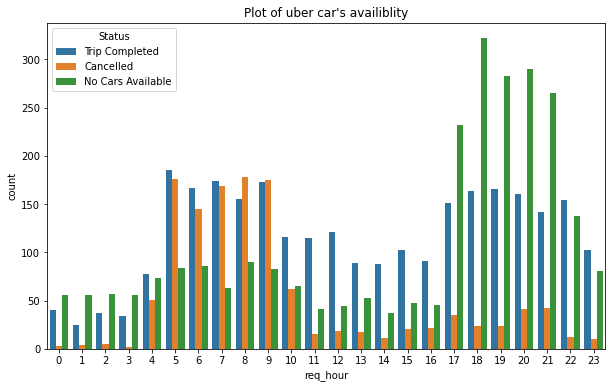

In [54]:
# missing or nan values: 
# for "Trip cancelled ", "cancelled", 'no cars available' - "status"
# making countplot:

plt.figure(figsize=(10,6))
sns.countplot(x="req_hour", data= df, hue="Status")
plt.title("Plot of uber car's availiblity")
plt.show()

## Visualization & Analyse:

<Figure size 864x432 with 0 Axes>

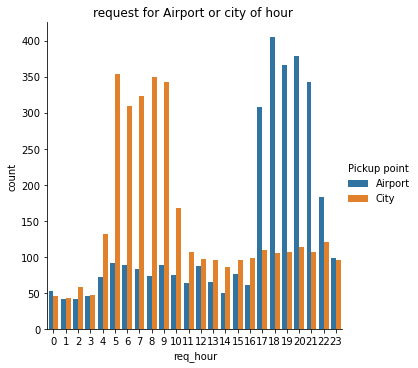

In [60]:
# plot for car available in city or airport:

plt.figure(figsize=(12,6))
sns.catplot(x="req_hour", data= df, hue="Pickup point", kind= "count")
plt.title("request for Airport or city of hour ")
plt.show()

##### as per plot: 
--> Between hours 5AM-9AM,almost equal amount of trips getting completed and cancelled.

--> Between hours 5PM-9PM, "No cars Available Status" is high. as may demands are high in these time splots.

--> Between hours 5AM-9AM, there is high demand in city.

--> Between hours 5PM-9PM, demands are high for airport users.

##### Adding new column 'Time_Slot' to make categories of hours from 'req_hour':

In [61]:
df["Time_Slot"] = 0

In [62]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


#### Hour Categories:
    
req_hour<5 as "Pre_Morning"

req_hour<10 as "Morning_Rush"

req_hour<17 as "Day_time"

req_hour<22 as "Evening_Rush"

else: "Late_Night"

In [66]:
j = 0

for i in df["req_hour"]:
        if df.iloc[j,6] < 5:
            df.iloc[j,8] = "Pre_Morning"
        
        elif 5 <= df.iloc[j,6] < 10:
            df.iloc[j,8] = "Morning_Rush"
        
        elif 10 <= df.iloc[j,6] < 17:
            df.iloc[j,8] = "Day_time"
            
        elif 17 <= df.iloc[j,6] < 22:
            df.iloc[j,8] = "Evening_Rush"
                    
        else:
            df.iloc[j,8] = "Late_night"
        j=j+1
            

In [67]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [68]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_time        1224
Pre_Morning      578
Late_night       498
Name: Time_Slot, dtype: int64

##### as per above count value "Evening_Rush" & "Morning_Rush" are the hours with maximum load.

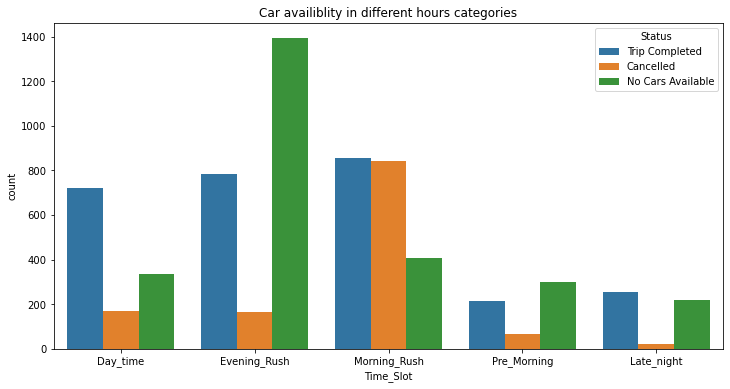

In [69]:
# after the categories of day_time, morning rush etc. will make plot 
# nd also add status of the car during the day .

plt.figure(figsize=(12,6))
sns.countplot(x="Time_Slot", hue="Status", data=df)
plt.title("Car availiblity in different hours categories")
plt.show()

In [70]:
df_morning_rush = df[df["Time_Slot"] == "Morning_Rush"]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

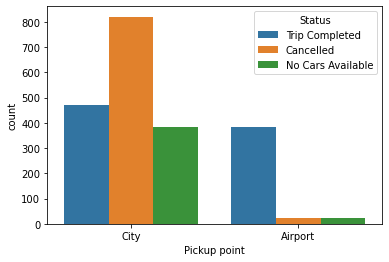

In [71]:
sns.countplot(x = "Pickup point", hue="Status", data=df_morning_rush)

### Cancellation of cab as per the pickup location at morning rush hours:

In [73]:
# pickup point = Airport = "cancelled trip" in morning rush:

df_airport_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(df_airport_cancelled)

23

In [74]:
# pickup point = city = "cancelled trip" in morning rush:

df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
len(df_city_cancelled)

820

##### so, as above two sells: there are 23 cars which is cancelled in Morning rush from the airport.
and 820 cars are cancelled in morning rush from the city.
--> so, in city demands are high nd cancellation ratio of city are higer than airport 

#### Morning Rush --> City

In [75]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [77]:
# cancellation from city in morning_rush:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]


820

In [79]:
# 'no cars available' in city during morning_rush:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

#### Morning Rush --> Airport

In [80]:
# total nos of pickup from airport durinng morning rush:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [86]:
# total nnos of acncellation from airport during morning rush:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [82]:
# total nos of 'trip completed' from airport during morning rush:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [87]:
# total nos of 'no cars availablity' from airport during morning rush:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

### Evening Rush:

In [85]:
df_evening_rush= df[df["Time_Slot"]== "Evening_Rush"]
df_evening_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush


In [88]:
df_city_cancelled=df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="CAncelled")]

Text(0.5, 1.0, 'Pickup points & cars availiblity during evening rush')

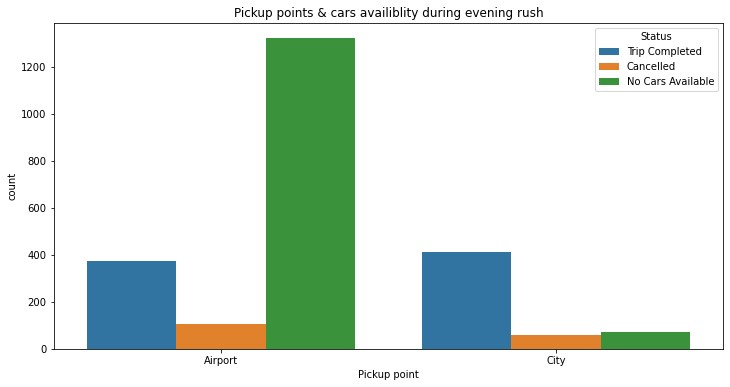

In [89]:
# making a plot for evening rish :

plt.figure(figsize=(12,6))
sns.countplot(x= "Pickup point", hue="Status", data= df_evening_rush)
plt.title("Pickup points & cars availiblity during evening rush")

In [91]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

### Evening Rush in City:

In [100]:
# total nos of cars in city during Evening rush:
df_evening_rush[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [101]:
#total nos of cancelled cars in city during Evening rush:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [102]:
# total nos trip completed in city during Evening rush:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [103]:
# total nos of cars are not available in city during Evening rush:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

### Evening Rush at Airport:

In [104]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [105]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [109]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [110]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

## Pie-Chart:

In [111]:
df_morning_city= df[(df["Pickup point"]=="City") & (df["Time_Slot"]=="Morning_Rush")]

In [112]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())

In [113]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [114]:
df_morning_city_count["Status"].values

array([820, 472, 385], dtype=int64)

In [115]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

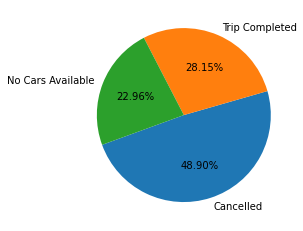

In [120]:
fig,ax = plt.subplots()
ax.pie(df_morning_city_count["Status"].values, labels = df_morning_city_count["Status"].index,
          autopct="%.2f%%", startangle=200)
plt.show()

In [121]:
df_evening_airport=df[(df["Pickup point"]=="Airport") & (df["Time_Slot"]=="Evening_Rush")]
df_evening_airport_count=pd.DataFrame(df_evening_airport["Status"].value_counts())
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [122]:
df_evening_airport_count["Status"].values

array([1321,  373,  106], dtype=int64)

In [123]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

##### fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values, labels=df_evening_airport_count["Status"].index,
      autopct="%.2f%%",startangle=200)
plt.show()

##### --> understanding dataset with the numbers of users requests and with the number of columns along with others facts with adding coloumns like "req_day" nd "req_hour". with this extra col. understand the data such as number/percentage of nans in each columns and drop timestamp columns.

##### --> format of dateTime inth erequest and drop timestamp columns.

##### --> extracted the day number and hour from the request timestamp columns to perform a deeper analysis.

##### --> between 5AM- 9AM, the load on cabs are high in city and also trip commpleted in high range.

##### --> like wise between 5PM - 9PM , the load on cab is high but at the airport. hence there is mismatch beetween cab demand and availiblity.

##### --> the "Morning_Rush" and "Evening_Rush" are the hours with maximum load.

##### --> during the "Evening_Rush" hours, no cars available status for the trip booking from "Airport".